# Most Dominant Color Extraction

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [23]:
img = cv2.imread('./khan.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

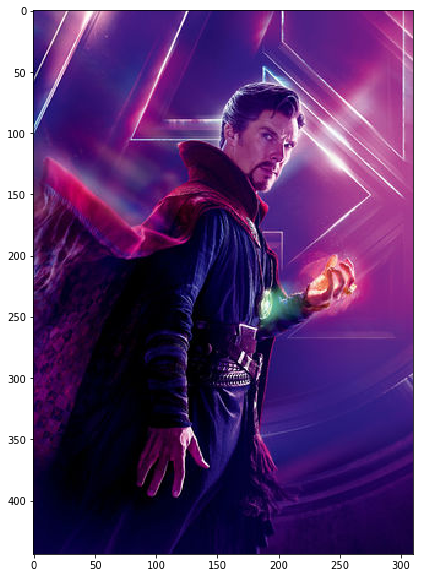

(444, 310, 3)


In [70]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
dshape = img.shape
print(img.shape)

In [71]:
o_img = img.copy()
c_img3 = img.copy()
c_img5 = img.copy()
c_img7 = img.copy()

c_img3 = np.reshape(c_img3,(-1,3))
c_img5 = np.reshape(c_img5,(-1,3))
c_img7 = np.reshape(c_img7,(-1,3))

print(c_img3.shape,c_img5.shape,c_img7.shape)

(137640, 3) (137640, 3) (137640, 3)


In [72]:
kmeans3 = KMeans(n_clusters=3,random_state=2)
kmeans5 = KMeans(n_clusters=5,random_state=2)
kmeans7 = KMeans(n_clusters=7,random_state=2)

In [73]:
kmeans3.fit(c_img3)
kmeans5.fit(c_img5)
kmeans7.fit(c_img7)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [74]:
center3 = kmeans3.cluster_centers_
center5 = kmeans5.cluster_centers_
center7 = kmeans7.cluster_centers_

In [75]:
center3 = np.array(center3,dtype='int8')
center5 = np.array(center5,dtype='uint8')
center7 = np.array(center7,dtype='uint8')

print(center3)
print(center5)
print(center7)

[[ 79  28 118]
 [ 14   1  42]
 [-79  97 -97]]
[[207 163 197]
 [ 42   5  76]
 [  5   0  29]
 [ 75  30 123]
 [155  62 139]]
[[  3   0  27]
 [156  55 136]
 [ 58  24 117]
 [183 112 166]
 [ 99  37 126]
 [ 38   3  69]
 [225 197 219]]


# Plot the Most Dominant Colors


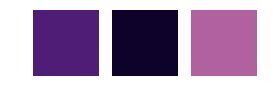

In [79]:
i=1
plt.figure(0,figsize=(4,2))

colors3 = []

for each_col in center3:
    
    plt.subplot(1,3,i)
    plt.axis("off")
    colors3.append(each_col)
    i += 1
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

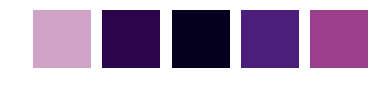

In [80]:
i=1
plt.figure(0,figsize=(6,3))

colors5 = []

for each_col in center5:
    
    plt.subplot(1,5,i)
    plt.axis("off")
    colors5.append(each_col)
    i += 1
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

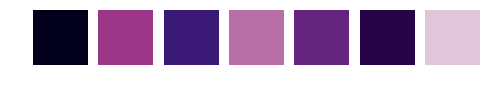

In [81]:
i=1
plt.figure(0,figsize=(8,4))

colors7 = []

for each_col in center7:
    
    plt.subplot(1,7,i)
    plt.axis("off")
    colors7.append(each_col)
    i += 1
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

# Segmenting Our Original Image

In [82]:
for i in range(c_img3.shape[0]):
    c_img3[i] = colors3[kmeans3.labels_[i]]
for i in range(c_img3.shape[0]):
    c_img5[i] = colors5[kmeans5.labels_[i]]
for i in range(c_img3.shape[0]):
    c_img7[i] = colors7[kmeans7.labels_[i]]

In [83]:
d_img3 = np.reshape(c_img3,dshape)
d_img5 = np.reshape(c_img5,dshape)
d_img7 = np.reshape(c_img7,dshape)

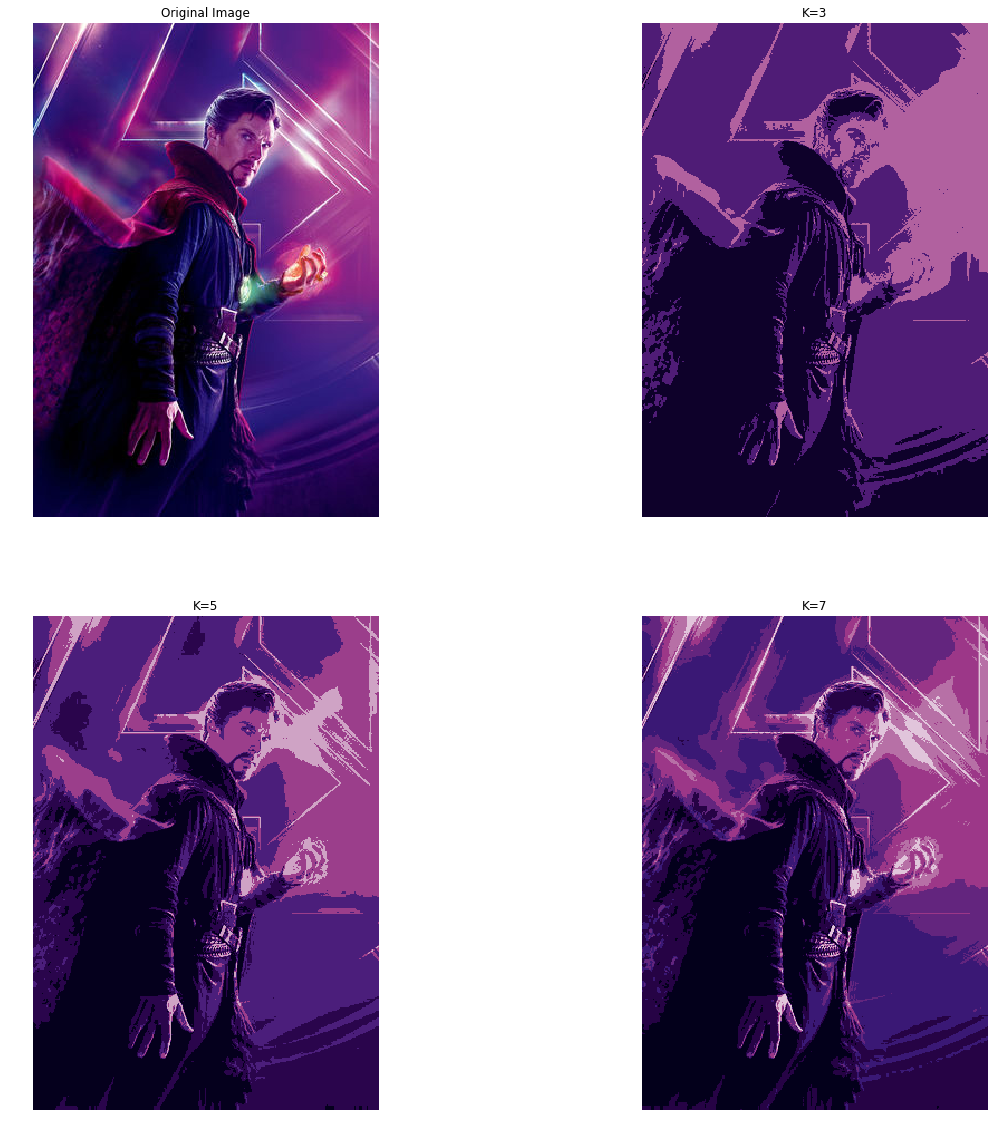

In [84]:
plt.figure(1,figsize=(20,20))


plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(o_img)

plt.subplot(2,2,2)
plt.axis("off")
plt.title("K=3")
plt.imshow(d_img3)

plt.subplot(2,2,3)
plt.axis("off")
plt.title("K=5")
plt.imshow(d_img5)

plt.subplot(2,2,4)
plt.axis("off")
plt.title("K=7")
plt.imshow(d_img7)

plt.show()